### Improt Library

In [36]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

### Import Dataset 

In [37]:
Data = pd.read_csv("housing_price_dataset.csv")
Data = Data[Data['YearBuilt'] >= 2000]
Data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
9,1121,5,2,Urban,2004,95961.926014
23,1343,2,3,Rural,2013,151733.922490
24,2515,2,3,Urban,2013,307961.107382


In [38]:
Data.info()
Data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 15098 entries, 4 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    15098 non-null  int64  
 1   Bedrooms      15098 non-null  int64  
 2   Bathrooms     15098 non-null  int64  
 3   Neighborhood  15098 non-null  object 
 4   YearBuilt     15098 non-null  int64  
 5   Price         15098 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 825.7+ KB


,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,15098.000000,15098.000000,15098.000000,15098.000000,15098.000000
mean,2007.339780,3.497483,1.996225,2010.479799,224918.741135
std,577.080952,1.122444,0.817474,6.315764,76529.632944
min,1000.000000,2.000000,1.000000,2000.000000,-24715.242482
25%,1511.000000,2.000000,1.000000,2005.000000,169997.821215
50%,2012.000000,3.000000,2.000000,2010.000000,225993.692575
75%,2508.750000,5.000000,3.000000,2016.000000,279246.621828
max,2999.000000,5.000000,3.000000,2021.000000,482577.163405


In [39]:
Data[Data['Price']<0]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1266,1024,2,2,Urban,2006,-24715.242482
3630,1235,3,2,Rural,2012,-19871.251146
5118,1140,4,1,Urban,2020,-23911.003119
10597,1177,2,3,Urban,2010,-434.097124
11991,1213,4,1,Suburb,2020,-4910.415323
20211,1049,3,1,Rural,2005,-18159.685676
36929,1078,5,1,Suburb,2015,-6159.039213


In [40]:
Data = Data.drop(Data[Data['Price'] < 0].index)
Data

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
4,2130,5,2,Suburb,2001,272436.239065
5,2095,2,3,Suburb,2020,198208.803907
9,1121,5,2,Urban,2004,95961.926014
23,1343,2,3,Rural,2013,151733.922490
24,2515,2,3,Urban,2013,307961.107382
...,...,...,...,...,...,...
49981,1564,4,3,Rural,2019,225878.769455
49982,2280,5,3,Suburb,2009,258515.417621
49987,2237,4,1,Rural,2011,227359.621341
49993,1215,2,3,Urban,2017,126052.390562


In [41]:
#checking if any price values are negative
Data[Data['Price'].isna()]
Data.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,15091.000000,15091.000000,15091.000000,15091.000000,15091.000000
mean,2007.746339,3.497581,1.996422,2010.478828,225029.574872
std,576.903527,1.122475,0.817462,6.315894,76373.853166
min,1000.000000,2.000000,1.000000,2000.000000,276.063516
25%,1511.000000,2.000000,1.000000,2005.000000,170054.766056
50%,2013.000000,3.000000,2.000000,2010.000000,226071.643617
75%,2509.000000,5.000000,3.000000,2016.000000,279271.372854
max,2999.000000,5.000000,3.000000,2021.000000,482577.163405


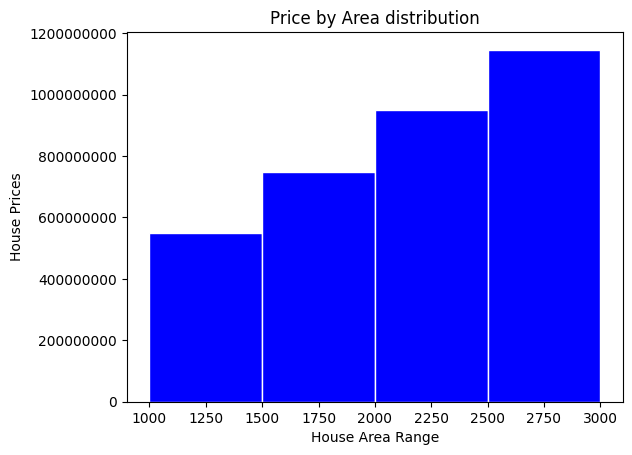

In [42]:
## Price by sq ft area
maxval=Data['SquareFeet'].max()
minval=Data['SquareFeet'].min()
area_bin=list(range(minval,maxval+500,500))

plt.hist(Data['SquareFeet'], bins=area_bin, weights=Data['Price'],color='blue', edgecolor="white")
plt.title('Price by Area distribution')
plt.ticklabel_format(style='plain')
plt.xlabel('House Area Range')
plt.ylabel('House Prices')
plt.show()

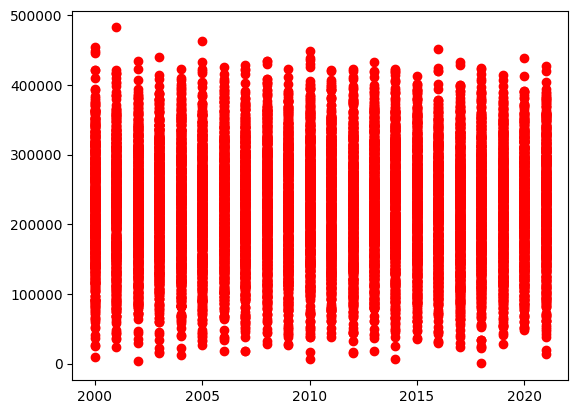

In [43]:
plt.scatter(Data['YearBuilt'], Data['Price'], color='red')
plt.show()

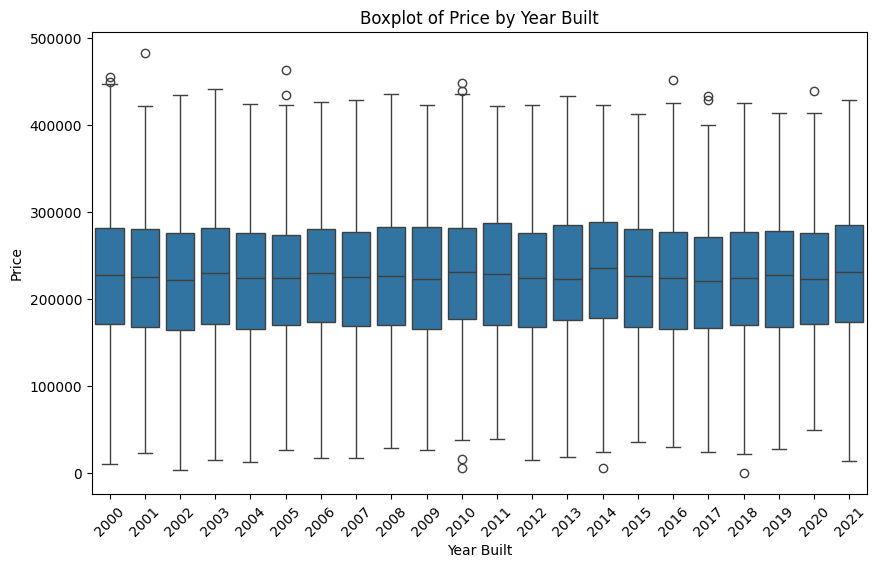

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearBuilt', y='Price', data=Data)
plt.title('Boxplot of Price by Year Built')
plt.xticks(rotation=45)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

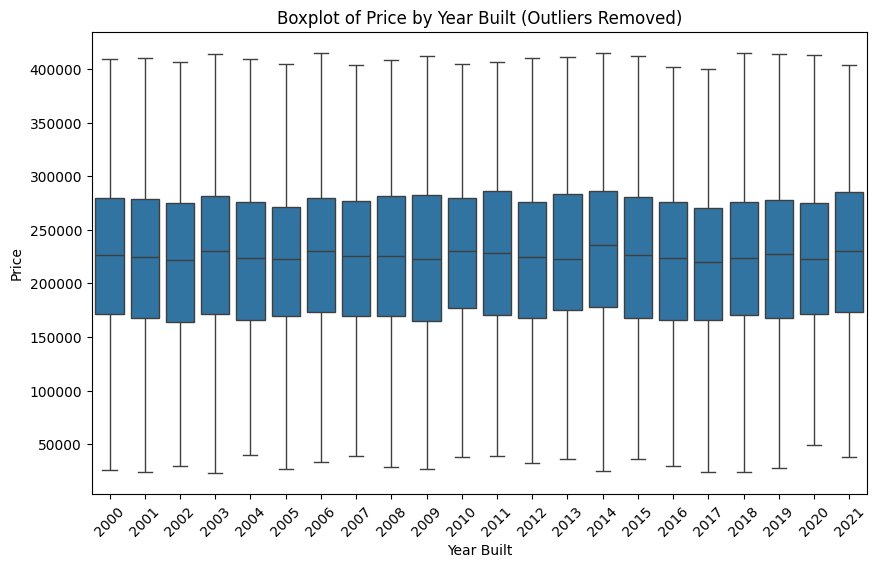

In [45]:
#คำนวณ IQR
Q1 = Data['Price'].quantile(0.25)
Q3 = Data['Price'].quantile(0.70)
IQR = Q3 - Q1

#กำหนดขอบเขตล่างและขอบเขตบน
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#ลบ outliers
Data = Data[(Data['Price'] >= lower_bound) & (Data['Price'] <= upper_bound)]

#สร้าง boxplot ใหม่จากข้อมูลที่ลบ outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='YearBuilt', y='Price', data=Data)
plt.title('Boxplot of Price by Year Built (Outliers Removed)')
plt.xticks(rotation=45)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()

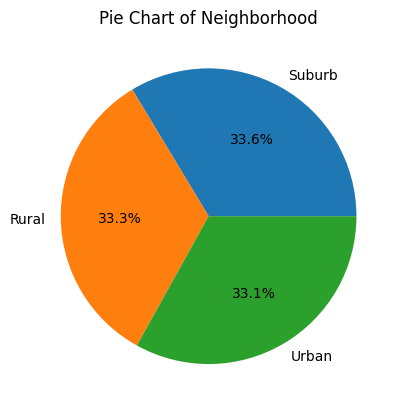

In [46]:
counts = Data['Neighborhood'].value_counts()
plt.pie(counts, labels = counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of ' + 'Neighborhood')
plt.show()

In [47]:
df = pd.get_dummies(Data).astype(int)
df.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
4,2130,5,2,2001,272436,0,1,0
5,2095,2,3,2020,198208,0,1,0
9,1121,5,2,2004,95961,0,0,1
23,1343,2,3,2013,151733,1,0,0
24,2515,2,3,2013,307961,0,0,1


In [48]:
# One-hot encode neighborhood
df

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Neighborhood_Rural,Neighborhood_Suburb,Neighborhood_Urban
4,2130,5,2,2001,272436,0,1,0
5,2095,2,3,2020,198208,0,1,0
9,1121,5,2,2004,95961,0,0,1
23,1343,2,3,2013,151733,1,0,0
24,2515,2,3,2013,307961,0,0,1
...,...,...,...,...,...,...,...,...
49981,1564,4,3,2019,225878,1,0,0
49982,2280,5,3,2009,258515,0,1,0
49987,2237,4,1,2011,227359,1,0,0
49993,1215,2,3,2017,126052,0,0,1


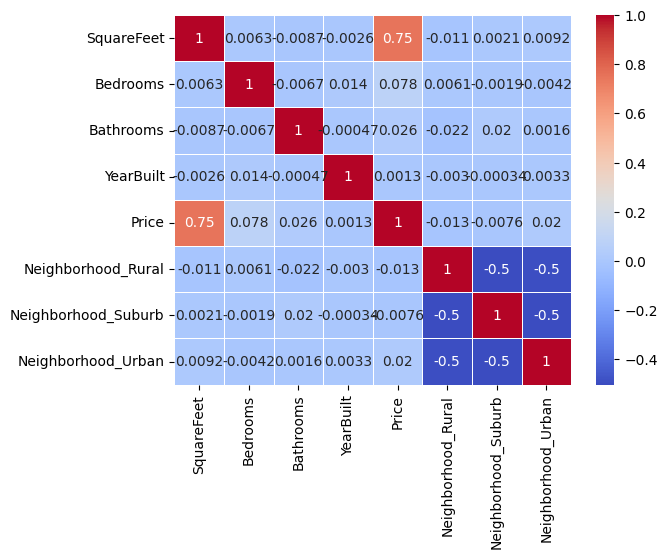

In [49]:
#generating correlation matrix,where price seems to be highly correlated to squarefeet  of the house
corr=df.corr()
corr
sns.heatmap(corr,annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

<H1>Mondeling and Model Comparison</H1>

In [50]:
X = df[['Bedrooms', 'Bathrooms', 'SquareFeet','Neighborhood_Rural', 'Neighborhood_Suburb', 'Neighborhood_Urban']]
Y = df['Price']


def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                # No hyperparameters to tune for LinearRegression
            }
        },
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 1, 10, 100]
            }
        },
        'elastic_net': {
            'model': ElasticNet(),
            'params': {
                'alpha': [0.1, 1, 10],
                'l1_ratio': [0.1, 0.5, 0.9]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        
        # Get the best estimator from GridSearchCV
        best_model = gs.best_estimator_
        
        # Save the best model to a file
        joblib.dump(best_model, f'{algo_name}_best_model.pkl')
        
        # Make predictions on the training data (you can also split into train/test sets if needed)
        y_pred = best_model.predict(X)
        
        # Calculate additional performance metrics
        r2 = r2_score(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)
        
        # Append all metrics to the scores list
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'r2_score': r2,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'r2_score', 'MAE', 'MSE', 'RMSE'])

# Example call to the function
best_models_df = find_best_model_using_gridsearchcv(X, Y)
print(best_models_df)


               model  best_score                      best_params  r2_score  \
0  linear_regression    0.568644                               {}  0.568309   
1              ridge    0.568657                   {'alpha': 100}  0.568308   
2        elastic_net    0.568705  {'alpha': 0.1, 'l1_ratio': 0.1}  0.568259   

            MAE           MSE          RMSE  
0  39556.739548  2.439883e+09  49395.174804  
1  39556.764322  2.439885e+09  49395.194222  
2  39558.687957  2.440162e+09  49397.999084  
